max_element(x) = 5
max_element(np.array([1, 2, 3])) = None
nearest_value(X, 3.6) = 4
Исходная матрица:
[[51 92 14]
 [71 60 20]
 [82 86 74]
 [74 87 99]
 [23  2 21]]

Масштабированная матрица:
[[-0.43361508  0.79149842 -0.9185736 ]
 [ 0.5090264  -0.16068013 -0.74416089]
 [ 1.02747921  0.61296494  0.82555349]
 [ 0.65042262  0.64272052  1.55227311]
 [-1.75331314 -1.88650376 -0.71509211]]
determinant: 62.94961211467601
trace: 39.23687197400862
min_element: 8.086719755342202
max_element: 11.579212815507391
frobenius_norm: 40.07509725199395
Среднее значение максимальных элементов: 8.4061
95-процентная квантиль: 11.8562
Самая частая причина отмены рейса: A
Количество случаев: 563
Расшифровка кодов:
A = carrier, B = weather, C = NAS, D = security
Среднее расстояние: 724.51 миль
Минимальное расстояние: 31 миль
Максимальное расстояние: 4962 миль
Минимальное расстояние: 31 миль
Количество рейсов с минимальным расстоянием: 6

Информация о рейсах с минимальным расстоянием:
       Year  Month  DayofM

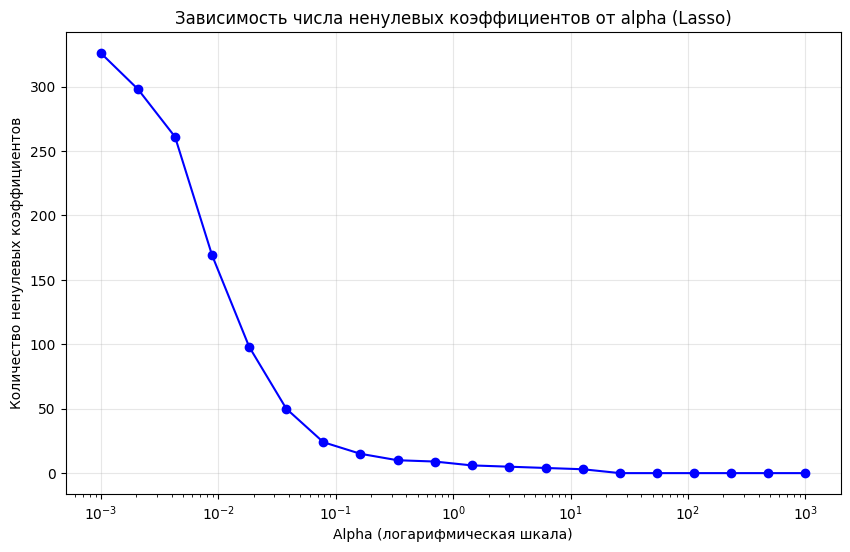

Метрики для Ridge регрессии:
  RMSE: 10.3438
  MAE: 7.2268
  R²: 0.9183
Подбор alpha для Ridge регрессии:

Подбор по метрике: r2
  Лучший alpha: 12.742750
  Лучшее значение метрики: 0.9192
  Результаты на тестовой выборке:
    RMSE: 9.9922
    MAE: 6.8579
    R²: 0.9237

Подбор по метрике: rmse
  Лучший alpha: 12.742750
  Лучшее значение метрики: -9.3598
  Результаты на тестовой выборке:
    RMSE: 9.9922
    MAE: 6.8579
    R²: 0.9237

Подбор по метрике: mae
  Лучший alpha: 26.366509
  Лучшее значение метрики: -6.5995
  Результаты на тестовой выборке:
    RMSE: 10.0071
    MAE: 6.8486
    R²: 0.9235


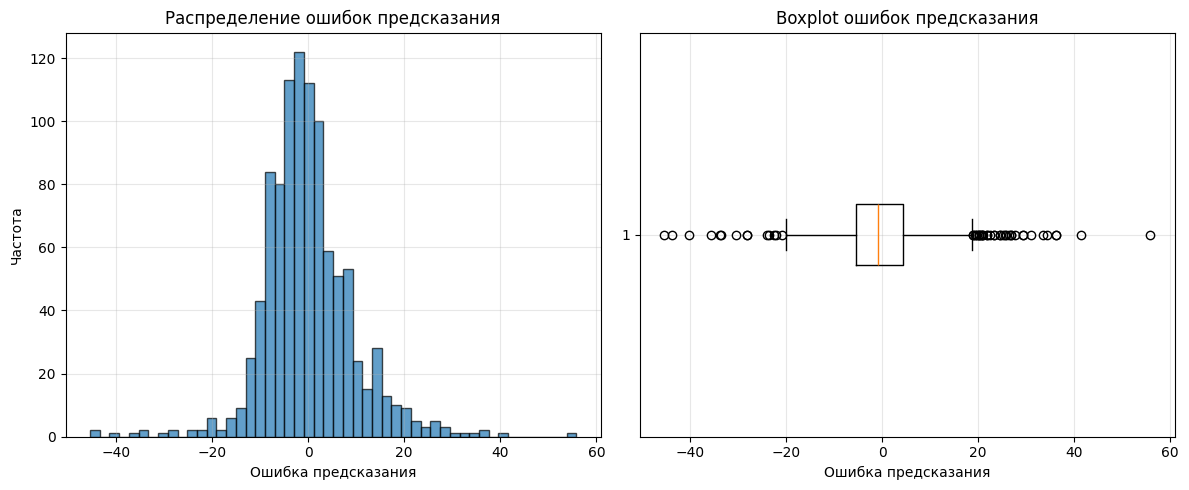

Статистика ошибок:
  Средняя ошибка: -0.0046
  Стандартное отклонение: 9.3548
  Минимальная ошибка: -45.4107
  Максимальная ошибка: 55.8286
  25-я процентиль: -5.3928
  Медиана: -0.8865
  75-я процентиль: 4.3462

Объекты-выбросы (ошибка > 28.0645): 16 из 1000
Доля выбросов: 1.60%


In [23]:
import numpy as np

#1
def max_element(arr):
    """
    Находит максимальный элемент после нулевого элемента в массиве.
    """
    # Находим индексы нулевых элементов
    zero_indices = np.where(arr == 0)[0]

    # Если нет нулевых элементов, возвращаем None
    if len(zero_indices) == 0:
        return None

    # Находим индексы элементов, стоящих после нулей
    after_zero_indices = zero_indices + 1

    # Фильтруем индексы, которые находятся в пределах массива
    valid_indices = after_zero_indices[after_zero_indices < len(arr)]

    # Если нет элементов после нулей, возвращаем None
    if len(valid_indices) == 0:
        return None

    # Находим максимальный элемент среди элементов после нулей
    return np.max(arr[valid_indices])

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(f"max_element(x) = {max_element(x)}")
print(f"max_element(np.array([1, 2, 3])) = {max_element(np.array([1, 2, 3]))}")

#2
def nearest_value(X, v):
    """
    Находит ближайший к v элемент в матрице X.
    """
    # Преобразуем матрицу в одномерный массив
    flattened = X.flatten()

    # Находим ближайший элемент
    idx = np.argmin(np.abs(flattened - v))

    return flattened[idx]

X = np.arange(0, 10).reshape((2, 5))
print(f"nearest_value(X, 3.6) = {nearest_value(X, 3.6)}")

#3
def scale(X):
    """
    Масштабирует каждый столбец матрицы X.
    """
    # Вычисляем среднее по столбцам
    mean = np.mean(X, axis=0)

    # Вычисляем стандартное отклонение по столбцам
    std = np.std(X, axis=0)

    # Защита от деления на ноль
    std[std == 0] = 1

    # Масштабируем
    scaled = (X - mean) / std

    return scaled

np.random.seed(42)
X = np.random.randint(0, 100, size=(5, 3))
print("Исходная матрица:")
print(X)
print("\nМасштабированная матрица:")
print(scale(X))

#4
def get_stats(X):
    """
    Вычисляет различные статистики для матрицы X.
    """
    stats = {}

    # Определитель (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['determinant'] = np.linalg.det(X)
    else:
        stats['determinant'] = "Не определен (матрица не квадратная)"

    # След (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['trace'] = np.trace(X)
    else:
        stats['trace'] = "Не определен (матрица не квадратная)"

    # Минимальный и максимальный элементы
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)

    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')

    # Собственные числа (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        try:
            eigenvalues = np.linalg.eigvals(X)
            stats['eigenvalues'] = eigenvalues
        except np.linalg.LinAlgError:
            stats['eigenvalues'] = "Не удалось вычислить"
    else:
        stats['eigenvalues'] = "Не определен (матрица не квадратная)"

    # Обратная матрица (только для квадратных невырожденных матриц)
    if X.shape[0] == X.shape[1]:
        try:
            inverse = np.linalg.inv(X)
            stats['inverse_matrix'] = inverse
        except np.linalg.LinAlgError:
            stats['inverse_matrix'] = "Не удалось вычислить (матрица вырожденная)"
    else:
        stats['inverse_matrix'] = "Не определен (матрица не квадратная)"

    return stats

np.random.seed(42)
X = np.random.normal(10, 1, size=(4, 4))
stats = get_stats(X)

for key, value in stats.items():
    if key not in ['inverse_matrix', 'eigenvalues']:
        print(f"{key}: {value}")

#5
np.random.seed(42)
max_values = []

for exp_num in range(100):
    # Генерируем две матрицы
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)

    # Перемножаем матрицы
    C = np.dot(A, B)

    # Находим максимальный элемент
    max_val = np.max(C)
    max_values.append(max_val)

# Вычисляем статистики
mean_max = np.mean(max_values)
percentile_95 = np.percentile(max_values, 95)

print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {percentile_95:.4f}")

#6
import pandas as pd
import numpy as np

df = pd.read_csv(r'D:\1Programmirovanie\LLM универ\3 лаба\homework-practice-03-linregr\2008.csv')

cancellation_counts = df['CancellationCode'].value_counts()
most_common_cancellation = cancellation_counts.idxmax()
most_common_count = cancellation_counts.max()

print(f"Самая частая причина отмены рейса: {most_common_cancellation}")
print(f"Количество случаев: {most_common_count}")
print("Расшифровка кодов:")
print("A = carrier, B = weather, C = NAS, D = security")

#7
distance_stats = {
    'mean': df['Distance'].mean(),
    'min': df['Distance'].min(),
    'max': df['Distance'].max()
}

print(f"Среднее расстояние: {distance_stats['mean']:.2f} миль")
print(f"Минимальное расстояние: {distance_stats['min']} миль")
print(f"Максимальное расстояние: {distance_stats['max']} миль")

#8
min_distance = df['Distance'].min()
min_distance_flights = df[df['Distance'] == min_distance]

print(f"Минимальное расстояние: {min_distance} миль")
print(f"Количество рейсов с минимальным расстоянием: {len(min_distance_flights)}")
print("\nИнформация о рейсах с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Origin', 'Dest', 'Distance']].head())

# Находим те же рейсы в другие дни
if len(min_distance_flights) > 0:
    # Берем первый такой рейс для анализа
    sample_flight = min_distance_flights.iloc[0]

    # Ищем тот же номер рейса в другие дни
    same_flight_num = df[df['FlightNum'] == sample_flight['FlightNum']]
    same_route = df[(df['Origin'] == sample_flight['Origin']) &
                    (df['Dest'] == sample_flight['Dest'])]

    print(f"\nСтатистика для рейса {sample_flight['FlightNum']} ({sample_flight['Origin']} → {sample_flight['Dest']}):")
    print(f"Количество дней с этим рейсом: {len(same_flight_num)}")
    print(f"Расстояния в другие дни: {same_route['Distance'].unique()}")

#9
departure_counts = df['Origin'].value_counts()
top_airport = departure_counts.idxmax()
top_count = departure_counts.max()

print(f"Аэропорт с наибольшим количеством вылетов: {top_airport}")
print(f"Количество вылетов: {top_count}")

# Справочник аэропортов (нужен дополнительный файл или база данных)
# Для примера предположим, что у нас есть словарь
airport_cities = {
    'ATL': 'Atlanta, GA',
    'ORD': 'Chicago, IL',
    'DFW': 'Dallas/Fort Worth, TX',
    'DEN': 'Denver, CO',
    'LAX': 'Los Angeles, CA'
}

if top_airport in airport_cities:
    print(f"Город: {airport_cities[top_airport]}")
else:
    print("Информация о городе не найдена")

#10
# Удаляем строки с пропущенными значениями AirTime
airtime_df = df.dropna(subset=['AirTime'])

# Группируем по аэропорту вылета и вычисляем среднее время полета
mean_airtime_by_origin = airtime_df.groupby('Origin')['AirTime'].mean()

# Находим аэропорт с наибольшим средним временем полета
max_airtime_airport = mean_airtime_by_origin.idxmax()
max_airtime_value = mean_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {max_airtime_airport}")
print(f"Среднее время полета: {max_airtime_value:.2f} минут")

# Топ-10 аэропортов
print("\nТоп-10 аэропортов по среднему времени полета:")
print(mean_airtime_by_origin.sort_values(ascending=False).head(10))

#11
# Создаем признак задержки
df['IsDelayed'] = df['DepDelay'] > 0

# Группируем по аэропорту
delayed_stats = df.groupby('Origin').agg({
    'IsDelayed': ['count', 'sum']
})

# Вычисляем долю задержанных рейсов
delayed_stats.columns = ['total_flights', 'delayed_flights']
delayed_stats['delay_ratio'] = delayed_stats['delayed_flights'] / delayed_stats['total_flights']

# Фильтруем аэропорты с менее чем 1000 рейсов
filtered_stats = delayed_stats[delayed_stats['total_flights'] >= 1000]

# Находим аэропорт с наибольшей долей задержек
max_delay_airport = filtered_stats['delay_ratio'].idxmax()
max_delay_ratio = filtered_stats['delay_ratio'].max()

print(f"Аэропорт с наибольшей долей задержанных рейсов (≥1000 рейсов): {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.4f} ({max_delay_ratio*100:.2f}%)")
print(f"Всего рейсов: {filtered_stats.loc[max_delay_airport, 'total_flights']}")
print(f"Задержанных рейсов: {filtered_stats.loc[max_delay_airport, 'delayed_flights']}")

# Топ-10 аэропортов по доле задержек
print("\nТоп-10 аэропортов по доле задержанных рейсов:")
print(filtered_stats.nlargest(10, 'delay_ratio')[['total_flights', 'delayed_flights', 'delay_ratio']])

#12
#Анализ пропущенных значений
print("Размерность данных:", df.shape)
print("\nПропущенные значения по столбцам:")
missing_by_column = df.isnull().sum()
print(missing_by_column[missing_by_column > 0])

total_missing = df.isnull().sum().sum()
print(f"\nВсего пропущенных элементов: {total_missing}")

rows_with_missing = df.isnull().any(axis=1).sum()
print(f"Объектов с хотя бы одним пропуском: {rows_with_missing}")

columns_with_missing = df.isnull().any(axis=0).sum()
print(f"Признаков с хотя бы одним пропущенным значением: {columns_with_missing}")

# Анализ целевой переменной
print(f"\nПропущенных значений в DepDelay: {df['DepDelay'].isnull().sum()}")
print(f"Нулевых значений в DepDelay: {(df['DepDelay'] == 0).sum()}")

# Анализ объектов с пропущенной целевой переменной
missing_depdelay = df[df['DepDelay'].isnull()]
print(f"\nОбъектов с пропущенным DepDelay: {len(missing_depdelay)}")

# Изучаем, чем характеризуются эти объекты
print("\nСтатистика по объектам с пропущенным DepDelay:")
print("Cancelled:", missing_depdelay['Cancelled'].unique())
print("Diverted:", missing_depdelay['Diverted'].unique())

# Очистка данных
# Удаляем строки с пропущенным DepDelay
df_clean = df.dropna(subset=['DepDelay'])

# Удаляем строки с DepDelay = 0
df_clean = df_clean[df_clean['DepDelay'] != 0]

# Выделяем целевую переменную
y = df_clean['DepDelay'].copy()
X = df_clean.drop('DepDelay', axis=1)

print(f"Размерность после очистки: {X.shape}")
print(f"Количество строк: {len(X)}")
print(f"Целевая переменная: {len(y)} значений")

#13
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

def convert_time_features(df, time_cols):
    """
    Преобразование временных признаков в часы и минуты
    """
    for col in time_cols:
        if col in df.columns:
            # Копируем данные
            temp_series = df[col].copy()

            # Преобразуем в строку и заполняем нулями
            temp_str = temp_series.fillna(-1).astype(int).astype(str).str.zfill(4)

            # Извлекаем часы и минуты с валидацией
            hours = temp_str.str[:2].replace('-1', np.nan)
            minutes = temp_str.str[2:].replace('-1', np.nan)

            # Преобразуем в числа
            hours = pd.to_numeric(hours, errors='coerce')
            minutes = pd.to_numeric(minutes, errors='coerce')

            # Валидация значений
            # Часы должны быть от 0 до 23 (или 0-24 для 2400)
            hours = hours.where((hours >= 0) & (hours <= 24), np.nan)

            # Минуты должны быть от 0 до 59
            minutes = minutes.where((minutes >= 0) & (minutes <= 59), np.nan)

            # Обработка 2400 как 00:00
            mask_2400 = (df[col] == 2400) | (df[col] == 24)
            hours = hours.where(~mask_2400, 0)

            # Добавляем новые признаки
            df[f'{col}_Hour'] = hours
            df[f'{col}_Minute'] = minutes

            # Удаляем исходный признак
            df = df.drop(col, axis=1)

    return df

# Применяем функцию
X = convert_time_features(X, time_columns)

print(f"Новая размерность: {X.shape}")
time_features = [col for col in X.columns if 'Hour' in col or 'Minute' in col]
print(f"Новые признаки времени ({len(time_features)}): {time_features}")
print(f"Пример преобразования:")
print(X[time_features].head())

#14
# Удаляем Year и TailNum
X = X.drop(['Year', 'TailNum'], axis=1, errors='ignore')

# Анализируем признаки, которые могут содержать информацию о задержке
# Согласно описанию, следующие признаки могут быть связаны:
# - ArrDelay (прибытие) сильно коррелирует с DepDelay (вылет)
# - CRSElapsedTime (плановое время полета)
# - ActualElapsedTime (фактическое время полета)

# Проверяем наличие этих признаков
correlated_cols = ['ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime']
cols_to_drop = []

for col in correlated_cols:
    if col in X.columns:
        print(f"Признак {col} будет удален, так как может содержать информацию о DepDelay")
        cols_to_drop.append(col)

X = X.drop(cols_to_drop, axis=1)
print(f"Размерность после удаления: {X.shape}")

#15
#Преобразование данных
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

def transform_data(data):
    """
    Преобразует данные для обучения линейных моделей.
    """
    # Определяем типы признаков
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

    # 1. Заполнение пропусков
    data_processed = data.copy()

    # Для числовых признаков - медиана
    for col in numeric_cols:
        if col in data_processed.columns:
            data_processed[col] = data_processed[col].fillna(data_processed[col].median())

    # Для категориальных - специальное значение
    for col in categorical_cols:
        if col in data_processed.columns:
            data_processed[col] = data_processed[col].fillna('nan')

    # 2. Масштабирование числовых признаков
    scaler = StandardScaler()

    # Применяем только к числовым признакам
    numeric_data = data_processed[numeric_cols]
    if len(numeric_cols) > 0:
        scaled_numeric = scaler.fit_transform(numeric_data)
        scaled_numeric_df = pd.DataFrame(scaled_numeric,
                                         columns=numeric_cols,
                                         index=data_processed.index)
    else:
        scaled_numeric_df = pd.DataFrame(index=data_processed.index)

    # 3. One-hot кодирование категориальных признаков
    if len(categorical_cols) > 0:
        categorical_data = data_processed[categorical_cols]
        # Используем pd.get_dummies для удобства
        encoded_categorical = pd.get_dummies(categorical_data,
                                             prefix_sep='_',
                                             dummy_na=False)
    else:
        encoded_categorical = pd.DataFrame(index=data_processed.index)

    # Объединяем результаты
    result = pd.concat([scaled_numeric_df, encoded_categorical], axis=1)

    return result

# Применяем преобразование к данным
X_transformed = transform_data(X)
print(f"Размерность после преобразования: {X_transformed.shape}")
print(f"Количество признаков: {X_transformed.shape[1]}")

#16
from sklearn.model_selection import train_test_split

# Для производительности возьмем подвыборку
sample_size = min(50000, len(X_transformed))
X_sample = X_transformed.sample(sample_size, random_state=42)
y_sample = y.loc[X_sample.index]

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер контрольной выборки: {X_test.shape}")

#17
# 17. Обучение линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Берем подвыборку для быстрого обучения
train_subset_size = min(1000, len(X_train))
X_train_subset = X_train.iloc[:train_subset_size]
y_train_subset = y_train.iloc[:train_subset_size]

# Обучаем модель
model = LinearRegression()
model.fit(X_train_subset, y_train_subset)

# Прогнозы
y_train_pred = model.predict(X_train_subset)
y_test_pred = model.predict(X_test)

# Метрики
train_mse = mean_squared_error(y_train_subset, y_train_pred)
train_r2 = r2_score(y_train_subset, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"На обучающей выборке (1000 объектов):")
print(f"  MSE: {train_mse:.4f}")
print(f"  R²: {train_r2:.4f}")

print(f"\nНа контрольной выборке:")
print(f"  MSE: {test_mse:.4f}")
print(f"  R²: {test_r2:.4f}")

# Анализ коэффициентов
print(f"\nКоличество коэффициентов: {len(model.coef_)}")
print(f"Среднее абсолютное значение коэффициентов: {np.mean(np.abs(model.coef_)):.4f}")
print(f"Максимальное абсолютное значение коэффициента: {np.max(np.abs(model.coef_)):.4f}")
print(f"Минимальное абсолютное значение коэффициента: {np.min(np.abs(model.coef_)):.4f}")

# Коэффициенты близкие к нулю
zero_threshold = 1e-5
near_zero_coefs = np.sum(np.abs(model.coef_) < zero_threshold)
print(f"Коэффициентов близких к нулю (|w| < {zero_threshold}): {near_zero_coefs}")

#18
# 18. Регуляризованные модели
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

# Lasso регрессия
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_subset, y_train_subset)

# Ridge регрессия
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_subset, y_train_subset)

# Анализ коэффициентов
print("Lasso модель:")
print(f"  Ненулевых коэффициентов: {np.sum(lasso_model.coef_ != 0)}")
print(f"  Всего коэффициентов: {len(lasso_model.coef_)}")

print("\nRidge модель:")
print(f"  Всего коэффициентов: {len(ridge_model.coef_)}")
print(f"  Среднее |w|: {np.mean(np.abs(ridge_model.coef_)):.4f}")

# График зависимости числа ненулевых коэффициентов от alpha для Lasso
alphas = np.logspace(-3, 3, 20)
non_zero_counts = []

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, random_state=42)
    lasso_temp.fit(X_train_subset, y_train_subset)
    non_zero = np.sum(lasso_temp.coef_ != 0)
    non_zero_counts.append(non_zero)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, non_zero_counts, 'bo-')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha (Lasso)')
plt.grid(True, alpha=0.3)
plt.show()

# Метрики для Ridge регрессии
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test_pred_ridge = ridge_model.predict(X_test)

# Вычисляем метрики
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
mae = mean_absolute_error(y_test, y_test_pred_ridge)
r2 = r2_score(y_test, y_test_pred_ridge)

print(f"Метрики для Ridge регрессии:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")

# Подбор гиперпараметров
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer

# Определяем сетку параметров
param_grid = {'alpha': np.logspace(-3, 3, 20)}

# Создаем модель
ridge = Ridge(random_state=42)

# Создаем стратегию кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Определяем метрики для подбора
scoring = {
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                       greater_is_better=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': 'r2'
}

# Подбор для каждой метрики
print("Подбор alpha для Ridge регрессии:")

for metric_name in ['r2', 'rmse', 'mae']:
    print(f"\nПодбор по метрике: {metric_name}")

    grid_search = GridSearchCV(
        ridge, param_grid,
        cv=cv,
        scoring=scoring[metric_name] if metric_name != 'r2' else metric_name,
        refit=True,
        n_jobs=-1
    )

    grid_search.fit(X_train_subset, y_train_subset)

    print(f"  Лучший alpha: {grid_search.best_params_['alpha']:.6f}")
    print(f"  Лучшее значение метрики: {grid_search.best_score_:.4f}")

    # Прогноз на тестовой выборке
    y_pred = grid_search.predict(X_test)

    # Вычисляем все метрики
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    print(f"  Результаты на тестовой выборке:")
    print(f"    RMSE: {test_rmse:.4f}")
    print(f"    MAE: {test_mae:.4f}")
    print(f"    R²: {test_r2:.4f}")

#19
#Поиск объектов-выбросов
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

# Используем RidgeCV с кросс-валидацией
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
ridge_cv.fit(X_train_subset, y_train_subset)

# Out-of-Fold предсказания
y_oof_pred = cross_val_predict(ridge_cv, X_train_subset, y_train_subset, cv=5)

# Ошибки
errors = y_train_subset - y_oof_pred

# Анализ распределения ошибок
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказания')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(errors, vert=False)
plt.xlabel('Ошибка предсказания')
plt.title('Boxplot ошибок предсказания')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика ошибок
print(f"Статистика ошибок:")
print(f"  Средняя ошибка: {errors.mean():.4f}")
print(f"  Стандартное отклонение: {errors.std():.4f}")
print(f"  Минимальная ошибка: {errors.min():.4f}")
print(f"  Максимальная ошибка: {errors.max():.4f}")
print(f"  25-я процентиль: {np.percentile(errors, 25):.4f}")
print(f"  Медиана: {np.median(errors):.4f}")
print(f"  75-я процентиль: {np.percentile(errors, 75):.4f}")

# Идентификация выбросов (ошибки больше 3 стандартных отклонений)
outlier_threshold = 3 * errors.std()
outliers = np.abs(errors) > outlier_threshold
print(f"\nОбъекты-выбросы (ошибка > {outlier_threshold:.4f}): {outliers.sum()} из {len(errors)}")
print(f"Доля выбросов: {outliers.mean()*100:.2f}%")